In [31]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [69]:
df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# Overview of this data set

In [58]:
df.sample(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2418,2.0,No,4.0,5.0,No,NaN,6.0,Extrovert
2482,11.0,Yes,3.0,2.0,Yes,3.0,1.0,Introvert


In [59]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [60]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [61]:
df.shape

(2900, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [38]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

# Fill missing value

In [81]:
for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())
    else:
# Check if the mode exists to prevent errors in columns with abnormal empty values
        if not df[column].mode().empty:
            df[column] = df[column].fillna(df[column].mode()[0])
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


# Prediction for Persionality

In [82]:
#Encoding Introvert → 0, Extrovert → 1
mapping = {
    'Stage_fear': {'Yes': 1, 'No': 0},
    'Drained_after_socializing': {'Yes': 1, 'No': 0},
    'Personality': {'Introvert': 0, 'Extrovert': 1}
}

# ใช้ inplace=True เพื่อให้มันเปลี่ยนค่าในตัวแปรเดิมทันที
df.replace(mapping, inplace=True)

# เช็คผล
print(df[['Stage_fear', 'Drained_after_socializing', 'Personality']].head())

   Stage_fear  Drained_after_socializing  Personality
0         0.0                        0.0            1
1         1.0                        1.0            0
2         1.0                        1.0            0
3         0.0                        0.0            1
4         0.0                        0.0            1


In [86]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0
2898,11.0,1.0,1.0,3.0,1.0,2.0,0.0,0


**Logistic Regression** built the prediction model

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   float64
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 181.4 KB


In [91]:
x = df[['Time_spent_Alone','Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing','Friends_circle_size','Post_frequency' ]]

In [92]:
y = df['Personality']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [97]:
model = LogisticRegression()

In [100]:
model.fit(x_train, y_train)

LogisticRegression()

In [103]:
y_pred = model.predict(x_test)

In [105]:
mse = mean_squared_error(y_test, y_pred)

In [108]:
print(f'mean_squared_error is', mse.round(2))

mean_squared_error is 0.07


 # --- Making a prediction for my own personality ---

In [120]:
my_data = [[9,1,3,2,1,3,0]]

In [121]:
bam_prediction = model.predict(my_data)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [125]:
result = "Introvert" if bam_prediction[0] == 0 else "Extrovert"
print(f'The result: Bam is an {result}')

The result: Bam is an Introvert


In [127]:
df.corr().round(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.00,0.84,-0.72,-0.74,0.84,-0.70,-0.72,-0.71
Stage_fear,0.84,1.00,-0.84,-0.86,0.98,-0.81,-0.83,-0.85
Social_event_attendance,-0.72,-0.84,1.00,0.73,-0.84,0.72,0.73,0.72
Going_outside,-0.74,-0.86,0.73,1.00,-0.86,0.72,0.75,0.74
Drained_after_socializing,0.84,0.98,-0.84,-0.86,1.00,-0.82,-0.83,-0.86
Friends_circle_size,-0.70,-0.81,0.72,0.72,-0.82,1.00,0.69,0.69
Post_frequency,-0.72,-0.83,0.73,0.75,-0.83,0.69,1.00,0.72
Personality,-0.71,-0.85,0.72,0.74,-0.86,0.69,0.72,1.00


<Axes: >

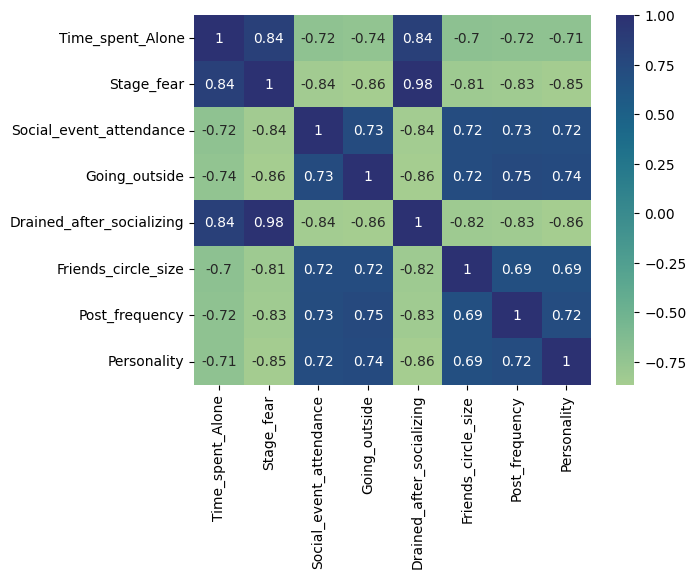

In [128]:
sns.heatmap(df.corr(),annot = True, cmap = 'crest')

- เลขใกล้ 1.0: สัมพันธ์กันมากในทิศทางเดียวกัน (ถ้าตัวหนึ่งเพิ่ม อีกตัวจะเพิ่มตาม)
- เลขใกล้ -1.0: สัมพันธ์กันมากในทิศทางตรงกันข้าม (ถ้าตัวหนึ่งเพิ่ม อีกตัวจะลดลง)
- เลขใกล้ 0: แทบไม่มีความสัมพันธ์กันเลย

คู่ที่สัมพันธ์กัน "สูงมาก" (Strong Positive Correlation):
- Stage_fear กับ Drained_after_socializing (0.98): นี่คือคู่ที่สัมพันธ์กันแรงที่สุดในตาราง หมายความว่าคนที่กลัวการขึ้นเวที/การแสดงออก มักจะมีอาการเหนื่อยล้าหลังจากการเข้าสังคมสูงมากตามไปด้วย
- Time_spent_Alone กับ Stage_fear (0.84) และ Drained_after_socializing (0.84): คนที่ชอบอยู่คนเดียวนานๆ มักจะมีความกลัวการแสดงออกและรู้สึกสูญเสียพลังงานจากการเข้าสังคมสูง

ความสัมพันธ์กับ Personality (หัวใจสำคัญของโปรเจกต์):
- Personality กับ Drained_after_socializing (-0.86) และ Stage_fear (-0.85): มีความสัมพันธ์ติดลบที่สูงมาก หมายความว่า ยิ่งค่า Personality เพิ่มขึ้น (เป็น Extrovert) ความเหนื่อยล้าหลังเข้าสังคมและความกลัวการแสดงออกจะยิ่ง ลดลง
- Personality กับ Going_outside (0.74) และ Social_event_attendance (0.72): มีความสัมพันธ์ในเชิงบวก หมายความว่าคนที่มีบุคลิกภาพค่อนไปทาง Extrovert จะมีแนวโน้มชอบออกไปข้างนอกและเข้าร่วมงานสังคมบ่อยกว่า

คู่ที่สัมพันธ์กันในทางตรงข้าม (Negative Correlation):
- Going_outside กับ Stage_fear (-0.86): คนที่ออกไปข้างนอกบ่อยๆ มักจะไม่ค่อยกลัวการแสดงออก (Stage fear ต่ำ)

# Social Media Engagement

In [129]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


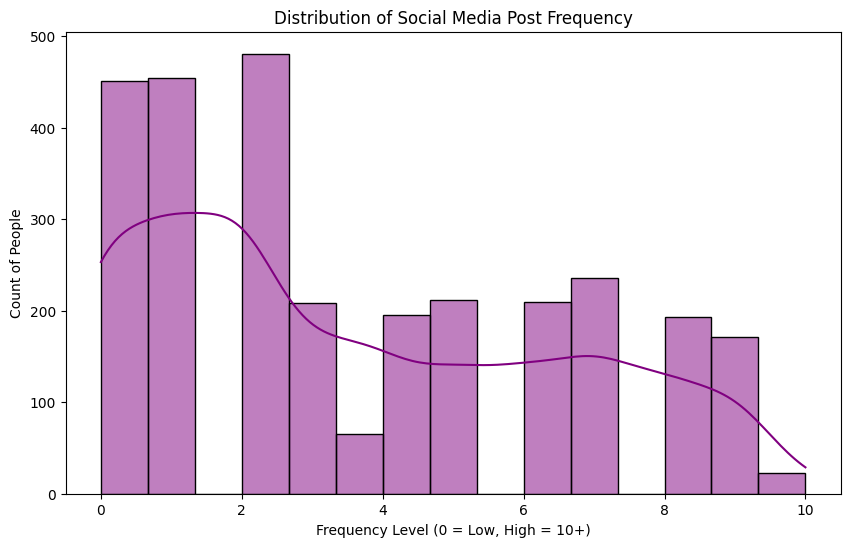

In [135]:
# View the frequency distribution of posts
plt.figure(figsize=(10, 6))
sns.histplot(df['Post_frequency'], bins=15, kde=True, color='purple')
plt.title('Distribution of Social Media Post Frequency')
plt.xlabel('Frequency Level (0 = Low, High = 10+)')
plt.ylabel('Count of People')
plt.show();

- แท่งสูงๆ ทางซ้าย (เลขน้อย): คือกลุ่ม Introvert (ซึ่งเป็นคนส่วนใหญ่ในข้อมูลชุดนี้)
- แท่งเตี้ยๆ ทางขวา (เลขมาก): คือกลุ่ม Extrovert ที่มีจำนวนน้อยกว่าแต่โพสต์บ่อยกว่า

# Compare the engagement between introverts and extroverts

Average Post Frequency by Personality:
Introvert (0): 1.42
Extrovert (1): 5.59


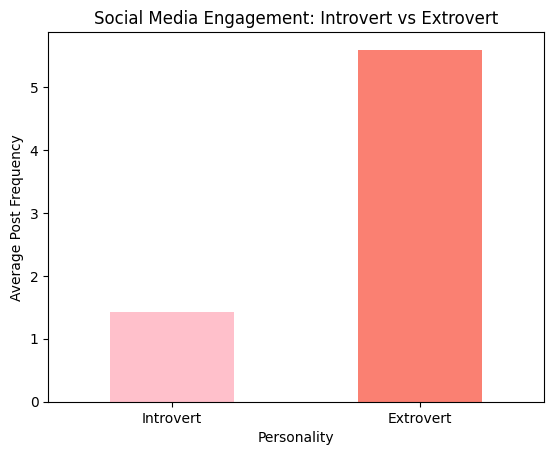

In [145]:
engagement_summary = df.groupby('Personality')['Post_frequency'].mean()

print("Average Post Frequency by Personality:")
print(f"Introvert (0): {engagement_summary[0]:.2f}")
print(f"Extrovert (1): {engagement_summary[1]:.2f}")

# วาดกราฟแท่งเปรียบเทียบ
engagement_summary.plot(kind='bar', color=['pink', 'salmon'])
plt.xticks([0, 1], ['Introvert', 'Extrovert'], rotation=0)
plt.ylabel('Average Post Frequency')
plt.title('Social Media Engagement: Introvert vs Extrovert')
plt.show()

In [138]:
max_post = df['Post_frequency'].max()
min_post = df['Post_frequency'].min()
mean_post = df['Post_frequency'].mean()

print(f"Maximum Post: {max_post}")
print(f"Minimum Post: {min_post}")
print(f"AVG Post: {mean_post:.2f}")

Maximum Post: 10.0
Minimum Post: 0.0
AVG Post: 3.56


In [139]:
print(df['Post_frequency'].describe())

count    2900.000000
mean        3.564727
std         2.893587
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: Post_frequency, dtype: float64


In [141]:
# หาค่าเฉลี่ยแยกกลุ่ม
avg_by_group = df.groupby('Personality')['Post_frequency'].mean().round()
print(avg_by_group)

Personality
0    1.0
1    6.0
Name: Post_frequency, dtype: float64


**Overlap Distribution**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


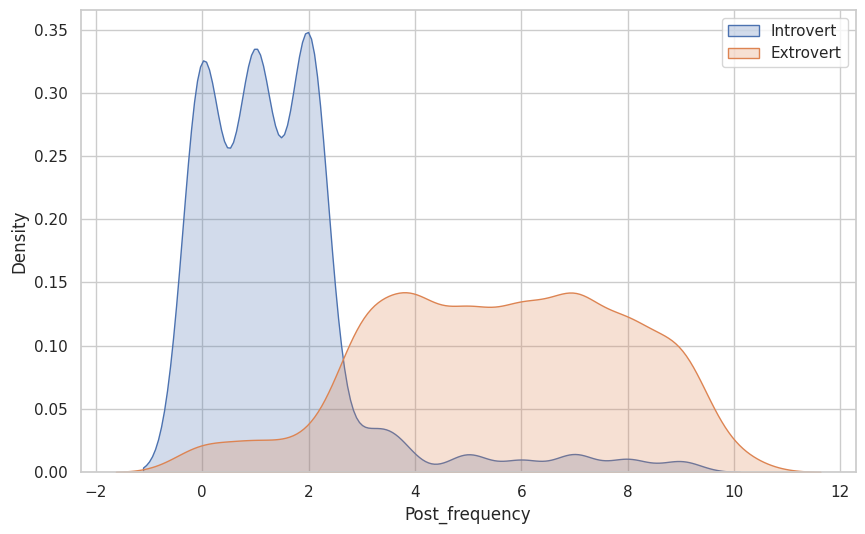

In [160]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Personality'] == 0]['Post_frequency'],
            label='Introvert', fill=True)

sns.kdeplot(df[df['Personality'] == 1]['Post_frequency'],
            label='Extrovert', fill=True)

plt.legend()
plt.show()


กลุ่ม Introvert (สีฟ้า): มีค่า Density สูงมาก ที่ช่วงคะแนน 0-2
หมายความว่า: คนกลุ่มนี้ "ส่วนใหญ่" มีพฤติกรรมโพสต์โซเชียลเหมือนๆ กัน คือแทบไม่โพสต์เลย ข้อมูลจึงมากองรวมกันจนเกิดเป็นยอดเขาสูงชัน
กลุ่ม Extrovert (สีส้ม): มีค่า Density ต่ำและกว้าง กระจายตั้งแต่คะแนน 3-10
หมายความว่า: คนกลุ่มนี้มีพฤติกรรมการโพสต์ที่ "หลากหลาย" ไม่เกาะกลุ่มกันแน่นเท่าคนสีฟ้า บางคนโพสต์ 4 ครั้ง บางคน 7 ครั้ง บางคน 9 ครั้ง ยอดเขาจึงดูแบนราบกว่า

**pair plot**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

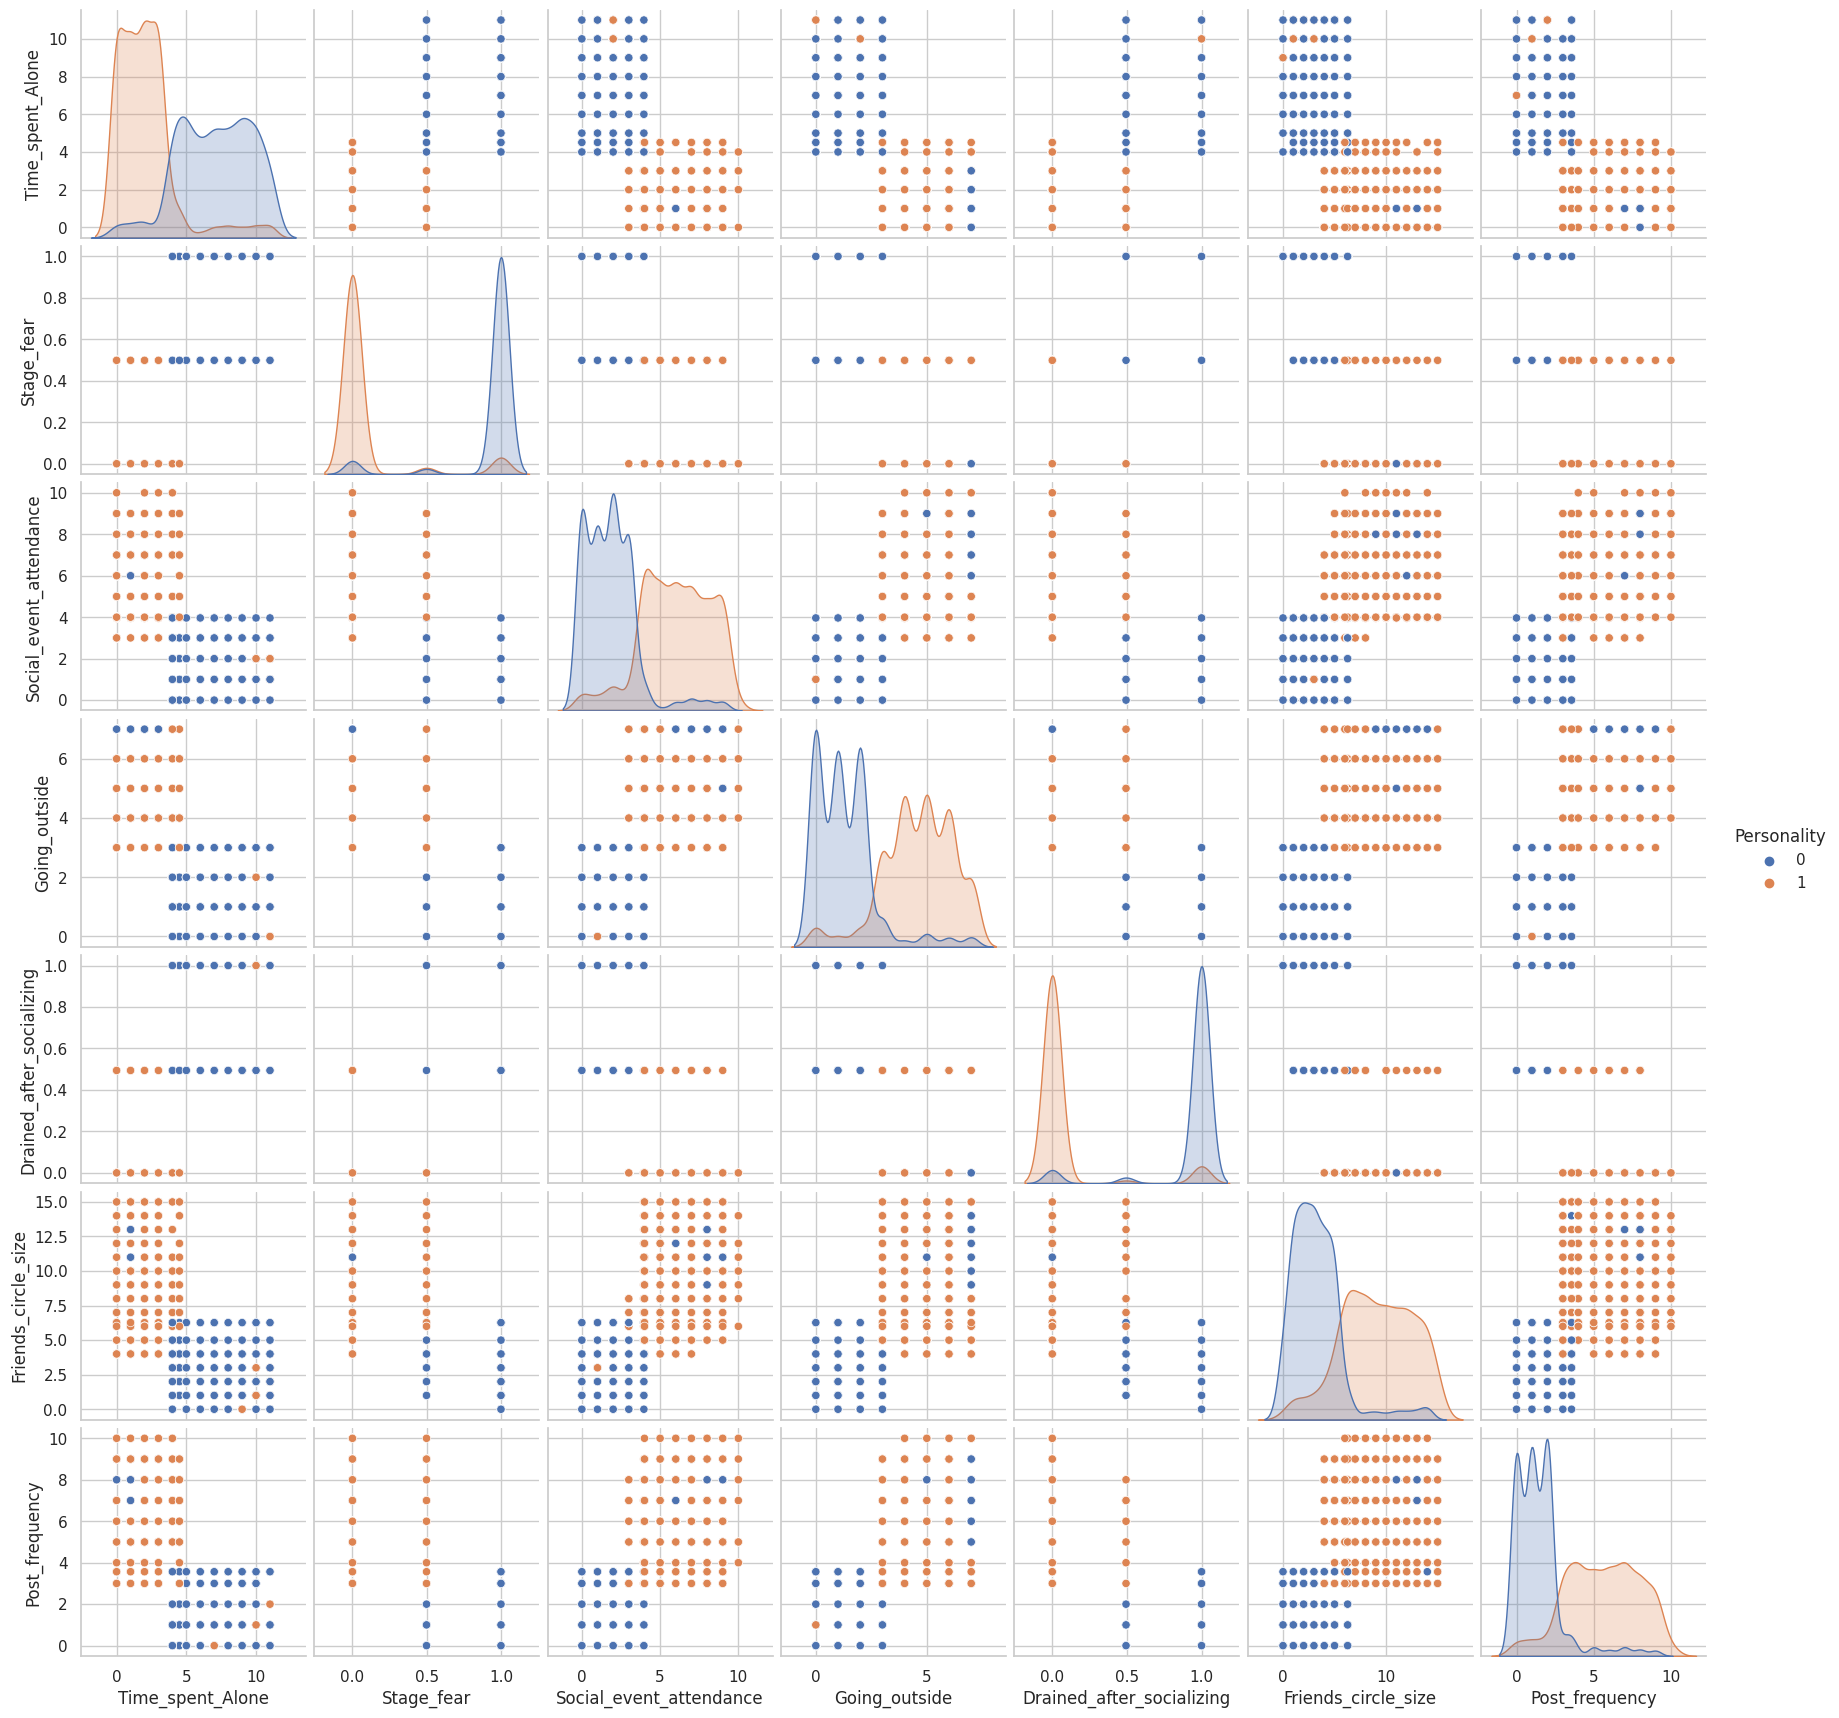

In [166]:
sns.pairplot( df, hue ='Personality')

| ตัวแปร                        | Introvert (น้ำเงิน)               | Extrovert (ส้ม)          | ความแตกต่าง                            |
| ----------------------------- | --------------------------------- | ------------------------ | -------------------------------------- |
| **Time spent Alone**          | ชอบอยู่คนเดียวมาก, พีคสูง (~8–10) | อยู่คนเดียวต่ำ (~0–2)    | ชัดเจนที่สุด                           |
| **Stage fear**                | กลัวเวทีสูง (~8–10)               | กลัวเวทีต่ำ (~0–2)       | แยกชัดเจน แทบไม่ทับซ้อน                |
| **Social event attendance**   | ไปงานสังคมน้อย (~0–2)             | ไปงานสังคมบ่อย (~8–10)   | แยกชัดเจน                              |
| **Going outside**             | ออกไปข้างนอกน้อย (~0–3)           | ออกไปข้างนอกบ่อย (~7–10) | ชัดเจน แต่มีทับซ้อนเล็กน้อยตรงกลาง     |
| **Drained after socializing** | เหนื่อยล้าง่ายหลังสังคม (~8–10)   | แทบไม่เหนื่อย (~0–2)     | แยกชัดเจนที่สุดอีกตัว                  |
| **Friends circle size**       | มีเพื่อนน้อย (~0–5)               | มีเพื่อนเยอะ (~10–15)    | แตกต่างชัด แต่สเกลตัวเลขต่างจากตัวอื่น |
| **Post frequency**            | โพสต์น้อย (~0–2)                  | โพสต์บ่อย (~8–10)        | แยกชัดเจน                              |

ข้อสังเกตเชิงลักษณะบุคลิกภาพ

Introvert (น้ำเงิน)
- อยู่คนเดียวเยอะ
- กลัวเวที / การแสดงออกต่อหน้าผู้คน
- ไม่ชอบงานสังคม
- รู้สึกเหนื่อยง่ายหลังสังคม
- มีเพื่อนน้อย
-ใช้โซเชียลมีเดียน้อย

Extrovert (ส้ม)
- อยู่คนเดียวน้อย
- ไม่กลัวเวที
- ชอบงานสังคม / ไปบ่อย
- ไม่เหนื่อยจากสังคม
- มีเพื่อนเยอะ
- ใช้โซเชียลมีเดียบ่อย